In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 1000)

In [2]:
import warnings
warnings.filterwarnings('ignore') #屏蔽掉pandas提示信息

# 数据预览

In [3]:
df = pd.DataFrame()

base = './data/'
files = os.listdir(base)
for f in files:
    if f.endswith('.xlsx') and not f.startswith('~$'): #后者是防止错误读取office缓存文件导致报错
        curdf = pd.read_excel(base + f)
        df = pd.concat([df, curdf])

In [4]:
df.reset_index(inplace = True, drop = True) #由于是多个dataframe合并所以一定要重置index(会有很多个1, 很多个2...),否则会导致后续去重出错
df.head(1)

,用户名,博文,发文时间,转发数,评论数,点赞数,用户主页_链接,微博认证,手机型号,超话_链接,话题1,话题2
0,DlwlrmaXD,本罪的犯罪主体，是达到刑事责任年龄，具有刑事责任能力的自然人，可以是中国公民，也可以是外国人或无国籍人。法人不能成为间谍罪的犯罪主体。,2020年10月11日 19:32,NaN,NaN,1.0,https://weibo.com/2977148123?refer_flag=1001030103_,https://vip.weibo.com/,微博视频号,https://s.weibo.com/weibo/%23%E5%8F%B0%E6%B9%BE%E9%97%B4%E8%B0%8D%23,#台湾间谍#,#国家安全机关破获数百起台湾间谍窃密案#


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20997 entries, 0 to 20996
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   用户名      20997 non-null  object 
 1   博文       20996 non-null  object 
 2   发文时间     20997 non-null  object 
 3   转发数      4756 non-null   float64
 4   评论数      5854 non-null   float64
 5   点赞数      8200 non-null   float64
 6   用户主页_链接  20997 non-null  object 
 7   微博认证     16948 non-null  object 
 8   手机型号     20355 non-null  object 
 9   超话_链接    20257 non-null  object 
 10  话题1      20257 non-null  object 
 11  话题2      16150 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.9+ MB


# 数据清洗

In [6]:
df.dropna(subset = ['博文'], axis=0, how='any', inplace=True) #如果博文为空,那么这是无效数据,没有价值

In [7]:
df = df[(~df['发文时间'].str.contains('今天')) & (~df['发文时间'].str.contains('前'))] #把'5分钟前', '今天08:56'这些特殊数据扔掉避免读入出错

# 今年的数据没有xxxx年,必须加上
def add_yearnum(x):
    if '年' not in x:
        return '2021年' + x
    return x

df['发文时间'] = df['发文时间'].apply(lambda x: add_yearnum(x))
df['发文时间'] = pd.to_datetime(df['发文时间'], format='%Y年%m月%d日 %H:%M')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20991 entries, 0 to 20996
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   用户名      20991 non-null  object        
 1   博文       20991 non-null  object        
 2   发文时间     20991 non-null  datetime64[ns]
 3   转发数      4751 non-null   float64       
 4   评论数      5848 non-null   float64       
 5   点赞数      8194 non-null   float64       
 6   用户主页_链接  20991 non-null  object        
 7   微博认证     16942 non-null  object        
 8   手机型号     20349 non-null  object        
 9   超话_链接    20253 non-null  object        
 10  话题1      20253 non-null  object        
 11  话题2      16147 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 2.1+ MB


In [9]:
df = df.sort_values(by="发文时间")
df.describe(include = 'all')

,用户名,博文,发文时间,转发数,评论数,点赞数,用户主页_链接,微博认证,手机型号,超话_链接,话题1,话题2
count,20991,20991,20991,4751.000000,5848.000000,8194.000000,20991,16942,20349,20253,20253,16147
unique,12925,12828,11400,NaN,NaN,NaN,12925,4,1142,5784,3074,1671
top,寒阳暖梅,#低龄未成年人刑责范围再调整#【#刑法修正案下调法定最低刑责年龄至12岁#】低龄未成年人严重犯罪问题，社会关注，如何做到不枉不纵，精准惩治？刑法修正案（十一）对此作出重大修改，对法定最低刑事责任年龄作个别下调。规定12周岁以上低龄未成年人实施以下犯罪行为，应当负刑事责任↓O12岁！低龄未成年人刑责范围再调整！ 收起全文d,2021-03-27 19:55:00,NaN,NaN,NaN,https://weibo.com/6471398703?refer_flag=1001030103_,https://verified.weibo.com/verify,微博 weibo.com,https://s.weibo.com/weibo?q=%23%E4%BD%8E%E9%BE%84%E6%9C%AA%E6%88%90%E5%B9%B4%E4%BA%BA%E5%88%91%E8%B4%A3%E8%8C%83%E5%9B%B4%E5%86%8D%E8%B0%83%E6%95%B4%23,展开全文c,展开全文c
freq,147,254,425,NaN,NaN,NaN,147,13959,4904,1355,2530,5649
first,NaN,NaN,2015-02-14 18:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-04-30 21:21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,49.305199,33.276163,335.879180,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,844.520301,440.459375,9307.039862,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# 去重,同一人发送多次完全相同内视为无效,仅保留一次
import hashlib

def get_md5(name, post):
    md5_object = hashlib.md5() 
    md5_object.update(name.encode('utf8') + post.encode('utf8'))
    md5_result = md5_object.hexdigest() 
    return md5_result

df['md5'] = df.apply(lambda x: get_md5(x['用户名'], x['博文']), axis = 1)

In [11]:
duplicate_count = pd.DataFrame()
duplicate_count['md5'] = df['md5'].value_counts().index
duplicate_count['cnt'] = df['md5'].value_counts().values

In [12]:
duplicate_count = duplicate_count[duplicate_count.cnt > 1]
print('重复博文共有{}条'.format(len(duplicate_count)))

重复博文共有412条


给所有的博文都计算出权重,方便后续处理(包括去重).各个参数可以自行定义

In [13]:
def count_weight(repost, reply, like):
    return repost + 0.5 * reply + 0.2 * like

In [14]:
df['weight'] = df.apply(lambda x: count_weight(x['转发数'], x['评论数'], x['点赞数']), axis = 1)

In [15]:
df.reset_index(inplace = True, drop = True)

df['idx'] = df.index.tolist()
max_weight = dict()
max_weight_index = dict()

def helper(md5, weight, idx):
    if md5 in set(duplicate_count['md5'].tolist()):
        if md5 not in max_weight:
            max_weight[md5] = weight
            max_weight_index[md5] = idx
        else:
            if weight > max_weight[md5]:
                max_weight[md5] = weight
                max_weight_index[md5] = idx

df.apply(lambda x: helper(x.md5, x.weight, x.idx), axis = 1)

def remover(md5, idx):
    if md5 in max_weight:
        if max_weight_index[md5] != idx:
            df.drop(idx, inplace = True)

df.apply(lambda x: remover(x.md5, x.idx), axis = 1);

In [16]:
# wb = df.iloc[df_date_idx.indexer_between_time('2020-06-11 00:00:00','2021-04-30 23:59:59')] #仅保留2020年6月-2021年4月的
wb = df[(df['发文时间'] >= '2020-06-13 00:00:00') & (df['发文时间'] <= '2021-04-30 23:59:59')]
wb = wb.drop(['用户主页_链接', '手机型号', '超话_链接', '话题1', '话题2', '手机型号', 'md5', 'idx'], axis = 1)

wb.reset_index(inplace = True, drop = True)

筛选出当前微博的关联话题和提及的用户(一般为转发)

In [17]:
import re
topic_pattern = re.compile("#\w+?#")
def related_topic(x):
    related = re.findall(topic_pattern, x)
    return list(set(related))

wb['related_topic'] = wb['博文'].apply(lambda x: related_topic(x))

referrer_pattern = re.compile("@\w+? ")

def referrer(x):
    referrer = re.findall(referrer_pattern, x)
    return list(set(referrer))

wb['referrers'] = wb['博文'].apply(lambda x: referrer(x))

In [18]:
video_pattern = re.compile("L\w+? ")

def remove_topic(content, topics):
    if topics:
        for topic in topics:
            content = content.replace(topic, '')
        return content
    return content

def remove_referrer(content, referrers):
    if referrers:
        for people in referrers:
            content = content.replace(people, '')
        return content
    return content

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_abnormal(content):
    content = content.replace('转发微博', '')
    content = content.replace('\u200b', '')
    return content.replace('收起全文d', '')

def remove_video(content):
    return re.sub(video_pattern, '', content)



wb['cleaned_content'] = wb.apply(lambda x: remove_topic(x['博文'], x.related_topic), axis = 1)
wb['cleaned_content'] = wb.apply(lambda x: remove_referrer(x['cleaned_content'], x.referrers), axis = 1)
wb['cleaned_content'] = wb['cleaned_content'].apply(lambda x: remove_html(x))
wb['cleaned_content'] = wb['cleaned_content'].apply(lambda x: remove_abnormal(x))
wb['cleaned_content'] = wb['cleaned_content'].apply(lambda x: remove_video(x))

# 仅保留去除后字符数量大于20的微博.丢弃过短的
wb = wb[wb['cleaned_content'].str.len() >= 20]
wb.reset_index(inplace = True, drop = True)

# 可视化

In [19]:
wb.describe(include = 'object')

,用户名,博文,微博认证,related_topic,referrers,cleaned_content
count,18689,18689,15316,18689,18689,18689
unique,11653,12052,4,2488,463,11022
top,寒阳暖梅,#低龄未成年人刑责范围再调整#【#刑法修正案下调法定最低刑责年龄至12岁#】低龄未成年人严重犯罪问题，社会关注，如何做到不枉不纵，精准惩治？刑法修正案（十一）对此作出重大修改，对法定最低刑事责任年龄作个别下调。规定12周岁以上低龄未成年人实施以下犯罪行为，应当负刑事责任↓O12岁！低龄未成年人刑责范围再调整！ 收起全文d,https://verified.weibo.com/verify,[],[],【】低龄未成年人严重犯罪问题，社会关注，如何做到不枉不纵，精准惩治？刑法修正案（十一）对此作出重大修改，对法定最低刑事责任年龄作个别下调。规定12周岁以上低龄未成年人实施以下犯罪行为，应当负刑事责任↓O12岁！低龄未成年人刑责范围再调整！
freq,143,227,12684,6341,16546,254


In [20]:
wb.describe()

,转发数,评论数,点赞数,weight
count,4477.000000,5525.000000,7697.000000,2996.000000
mean,51.791155,34.761086,356.304924,288.246963
std,869.894276,453.066650,9602.434906,4249.412459
min,1.000000,1.000000,1.000000,1.700000
25%,1.000000,1.000000,1.000000,4.900000
50%,3.000000,3.000000,3.000000,12.700000
75%,9.000000,11.000000,10.000000,39.200000
max,32779.000000,18975.000000,563892.000000,132017.900000


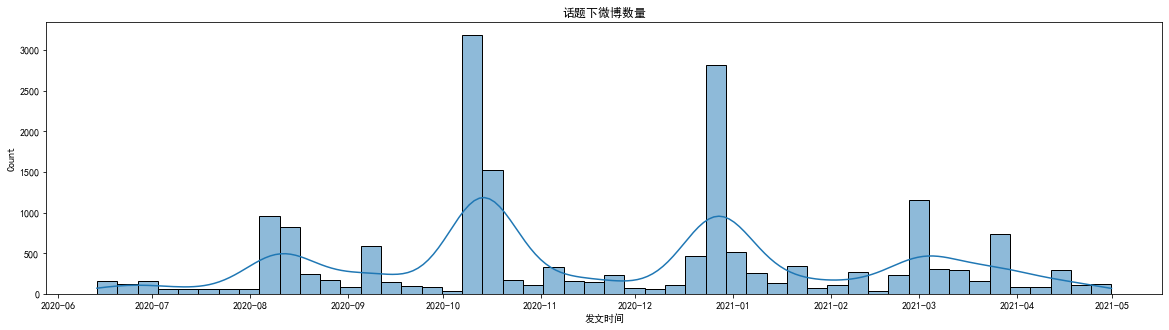

In [21]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize = (20, 5))
sns.histplot(data = wb, x = '发文时间', kde = True)
plt.title('话题下微博数量')
plt.show()

In [22]:
from collections import Counter

ls = []
for item in wb['related_topic']:
    ls += item

related_topics = Counter(ls)
topic_df = pd.DataFrame()
topic_df['topic'] = related_topics.keys()
topic_df['count'] = related_topics.values()

topic_df.sort_values(by = 'count', inplace = True, ascending = False)

topic_df.head(50)

,topic,count
1550,#低龄未成年人刑责范围再调整#,1472
157,#我国修法拟调整法定最低刑事责任年龄#,1272
755,#12至14岁故意杀人等犯罪或将负刑责#,1069
1613,#刑法修正案下调法定最低刑责年龄至12岁#,887
254,#拟对有严重不良行为未成年人专门教育#,642
2113,#法定最低刑责年龄个别下调至12岁#,531
2112,#冒名顶替他人入学入刑#,517
1622,#刑法最新修改内容#,411
594,#大连13岁行凶男孩家人始终不道歉#,391
1816,#调整低龄未成年人刑责年龄有两个特#,370


In [23]:
user_ptable = pd.pivot_table(wb, index = ['用户名', '微博认证'], aggfunc={'博文':len})
user_ptable = user_ptable.reindex(user_ptable['博文'].sort_values(ascending=False).index)

user_ptable.head(20)

,,博文
用户名,微博认证,
寒阳暖梅,https://vip.weibo.com/,143
马浩才,https://vip.weibo.com/,90
隆尧司法官博,https://verified.weibo.com/verify,29
西湖检察,https://verified.weibo.com/verify,23
江北检察,https://verified.weibo.com/verify,22
临安检察,https://verified.weibo.com/verify,20
红星新闻,https://verified.weibo.com/verify,19
新京报动新闻,https://verified.weibo.com/verify,18
内丘司法,https://verified.weibo.com/verify,18


在该话题下有效微博最多的用户:

In [24]:
ls = []
for item in wb['referrers']:
    ls += item

ref_cnt = Counter(ls)
ref_df = pd.DataFrame()
ref_df['topic'] = ref_cnt.keys()
ref_df['count'] = ref_cnt.values()

ref_df.sort_values(by = 'count', inplace = True, ascending = False)

ref_df.head(20)

,topic,count
7,@新华视点,344
4,@央视新闻,309
82,@澎湃新闻,97
81,@新京报动新闻,90
398,@沸点视频,81
573,@成都金牛公安,57
351,@大连受害者淇淇妈妈,50
595,@tereasa莎莎莎莎,47
597,@江宁婆婆,47
200,@快手,41


热度最高的前20条博文

In [25]:
wb.sort_values(by = 'weight', ascending = False).loc[:20, ['博文', 'weight']];
# 加一个分号就可以不输出当前格子了

这里使用结巴中文分词工具进行分词, 说明文档:https://github.com/fxsjy/jieba

In [26]:
import jieba

停用词来自:https://github.com/goto456/stopwords 中中文停用词表,并进行了自定义

In [27]:
with open('./materials/stops.txt', 'rb') as f:
    stopwords = f.readlines()

stops = set()
for w in stopwords:
    w = w.strip() #去除可能存在的换行号和空格
    stops.add(w.decode('utf8')) #解码为中文

In [28]:
def cut_words(x):
    seg_list = jieba.cut(x, cut_all=False)
    res = []
    for word in seg_list:
        if word not in stops and word != ' ':
            res.append(word)
    return res

wb['words'] = wb['cleaned_content'].apply(lambda x: cut_words(x))


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Admin\AppData\Local\Temp\jieba.cache
Loading model cost 0.650 seconds.
Prefix dict has been built successfully.


In [29]:
def get_all_words(df):
    res = ''
    for words in df['words']:
        res += ' '.join(words)
    return res

def get_words_count(df):
    ls = []
    for words in df['words']:
        ls += words
    c = Counter(ls)
    c = {k:c[k] for k in c if not re.match('^\s*$', k)}
    cnt_df = pd.DataFrame()
    cnt_df['word'] = c.keys()
    cnt_df['count'] = c.values()
    cnt_df.sort_values(by = 'count', ascending = False, inplace = True)
    return cnt_df

In [30]:
from wordcloud import WordCloud

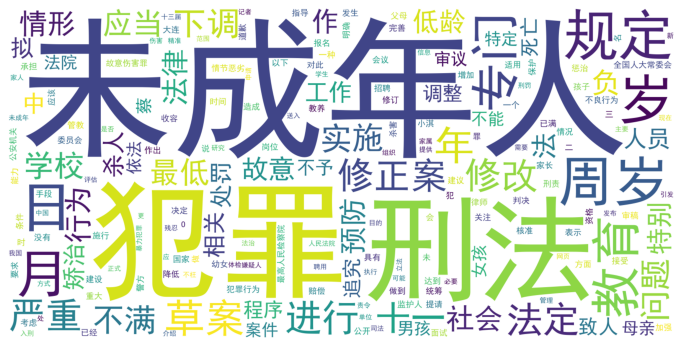

In [31]:
font = r'‪C:\Windows\Fonts\simhei.ttf' #解决wordcloud不支持中文的问题.如果自己的字体安装位置不一样,需要改掉
wc = WordCloud(font_path = font, background_color='white', collocations=False, scale = 4).generate(get_all_words(wb))#scale越大图片越清楚
plt.figure(figsize = (12, 8))
plt.imshow(wc)
plt.axis('off')
plt.show()

10月13日: 提出下调刑事责任年龄的草案.当日的微博词云

In [32]:
wb_1013 = wb[(wb['发文时间'] >= '2020-10-13 00:00:00') & (wb['发文时间'] <= '2020-10-13 23:59:59')]

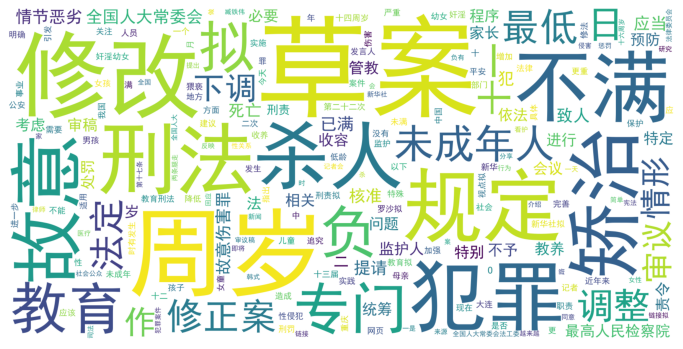

In [33]:
wc_1013 = WordCloud(font_path = font, background_color='white', collocations=False, scale = 4).generate(get_all_words(wb_1013))
plt.figure(figsize = (12, 8))
plt.imshow(wc_1013)
plt.axis('off')
plt.show()

In [34]:
words_1013 = get_words_count(wb_1013)
words_1013.head(20)

,word,count
413,草案,4090
2476,周岁,3105
425,修改,2825
194,拟,2448
424,刑法,2385
926,规定,2045
2466,不满,1936
405,犯罪,1914
190,教育,1853
704,杀人,1713


12月16日正式修改

In [35]:
wb_1226 = wb[(wb['发文时间'] >= '2020-12-26 00:00:00') & (wb['发文时间'] <= '2020-12-26 23:59:59')]

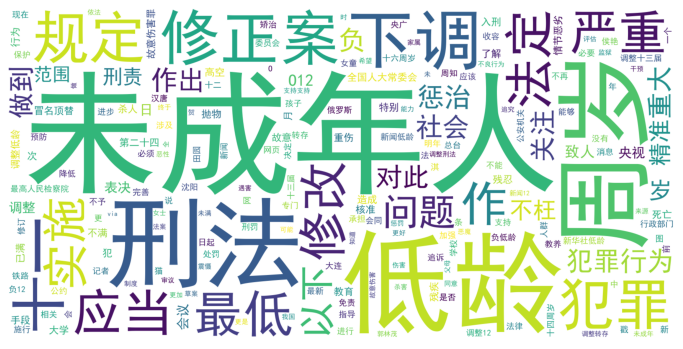

In [36]:
wc_1226 = WordCloud(font_path = font, background_color='white', collocations=False, scale = 4).generate(get_all_words(wb_1226)) #scale越大图片越清楚
plt.figure(figsize = (12, 8))
plt.imshow(wc_1226)
plt.axis('off')
plt.show()

In [37]:
words_1226 = get_words_count(wb_1226)
words_1226.head(20)

,word,count
26,未成年人,3126
139,低龄,2771
30,12,1835
4,刑法,1653
16,周岁,1643
13,下调,1546
5,修正案,1523
6,十一,1432
12,最低,1374
29,规定,1373


每隔15条微博抽取其中一条作为抽样集(可以用来做情绪标记)

In [38]:
sample_df = pd.DataFrame(columns = wb.columns.tolist())
curidx = 0
for i in range(0, wb.shape[0], 15):
    sample_df.loc[curidx] = wb.loc[i]
    curidx += 1

In [39]:
to_export = sample_df.loc[:, ['发文时间', '用户名', '博文', '评论数', '转发数', '点赞数']]
to_export.to_csv('sample.csv', index = False);